### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

In [2]:
# reading the CSV file into pandas dataframe
vehicle_df = pd.read_csv("vehicle.csv")  
vehicle_df.shape

(846, 19)

In [3]:
vehicle_dna_df = vehicle_df.dropna()

In [4]:
vehicle_dna_df.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [5]:
vehicle_dna_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

### Check for any missing values in the data 

In [6]:
vehicle_dna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

In [7]:
vehicle_dna_df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### 3. Standardize the data 

In [8]:
vehicle_dna_df['class'] = vehicle_dna_df['class'].replace({'car': 1, 'van': 2, 'bus':3})
vehicle_dna_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_ratio    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [9]:
#vehicle_df_attr = vehicle_dna_df.iloc[:, 0:19]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


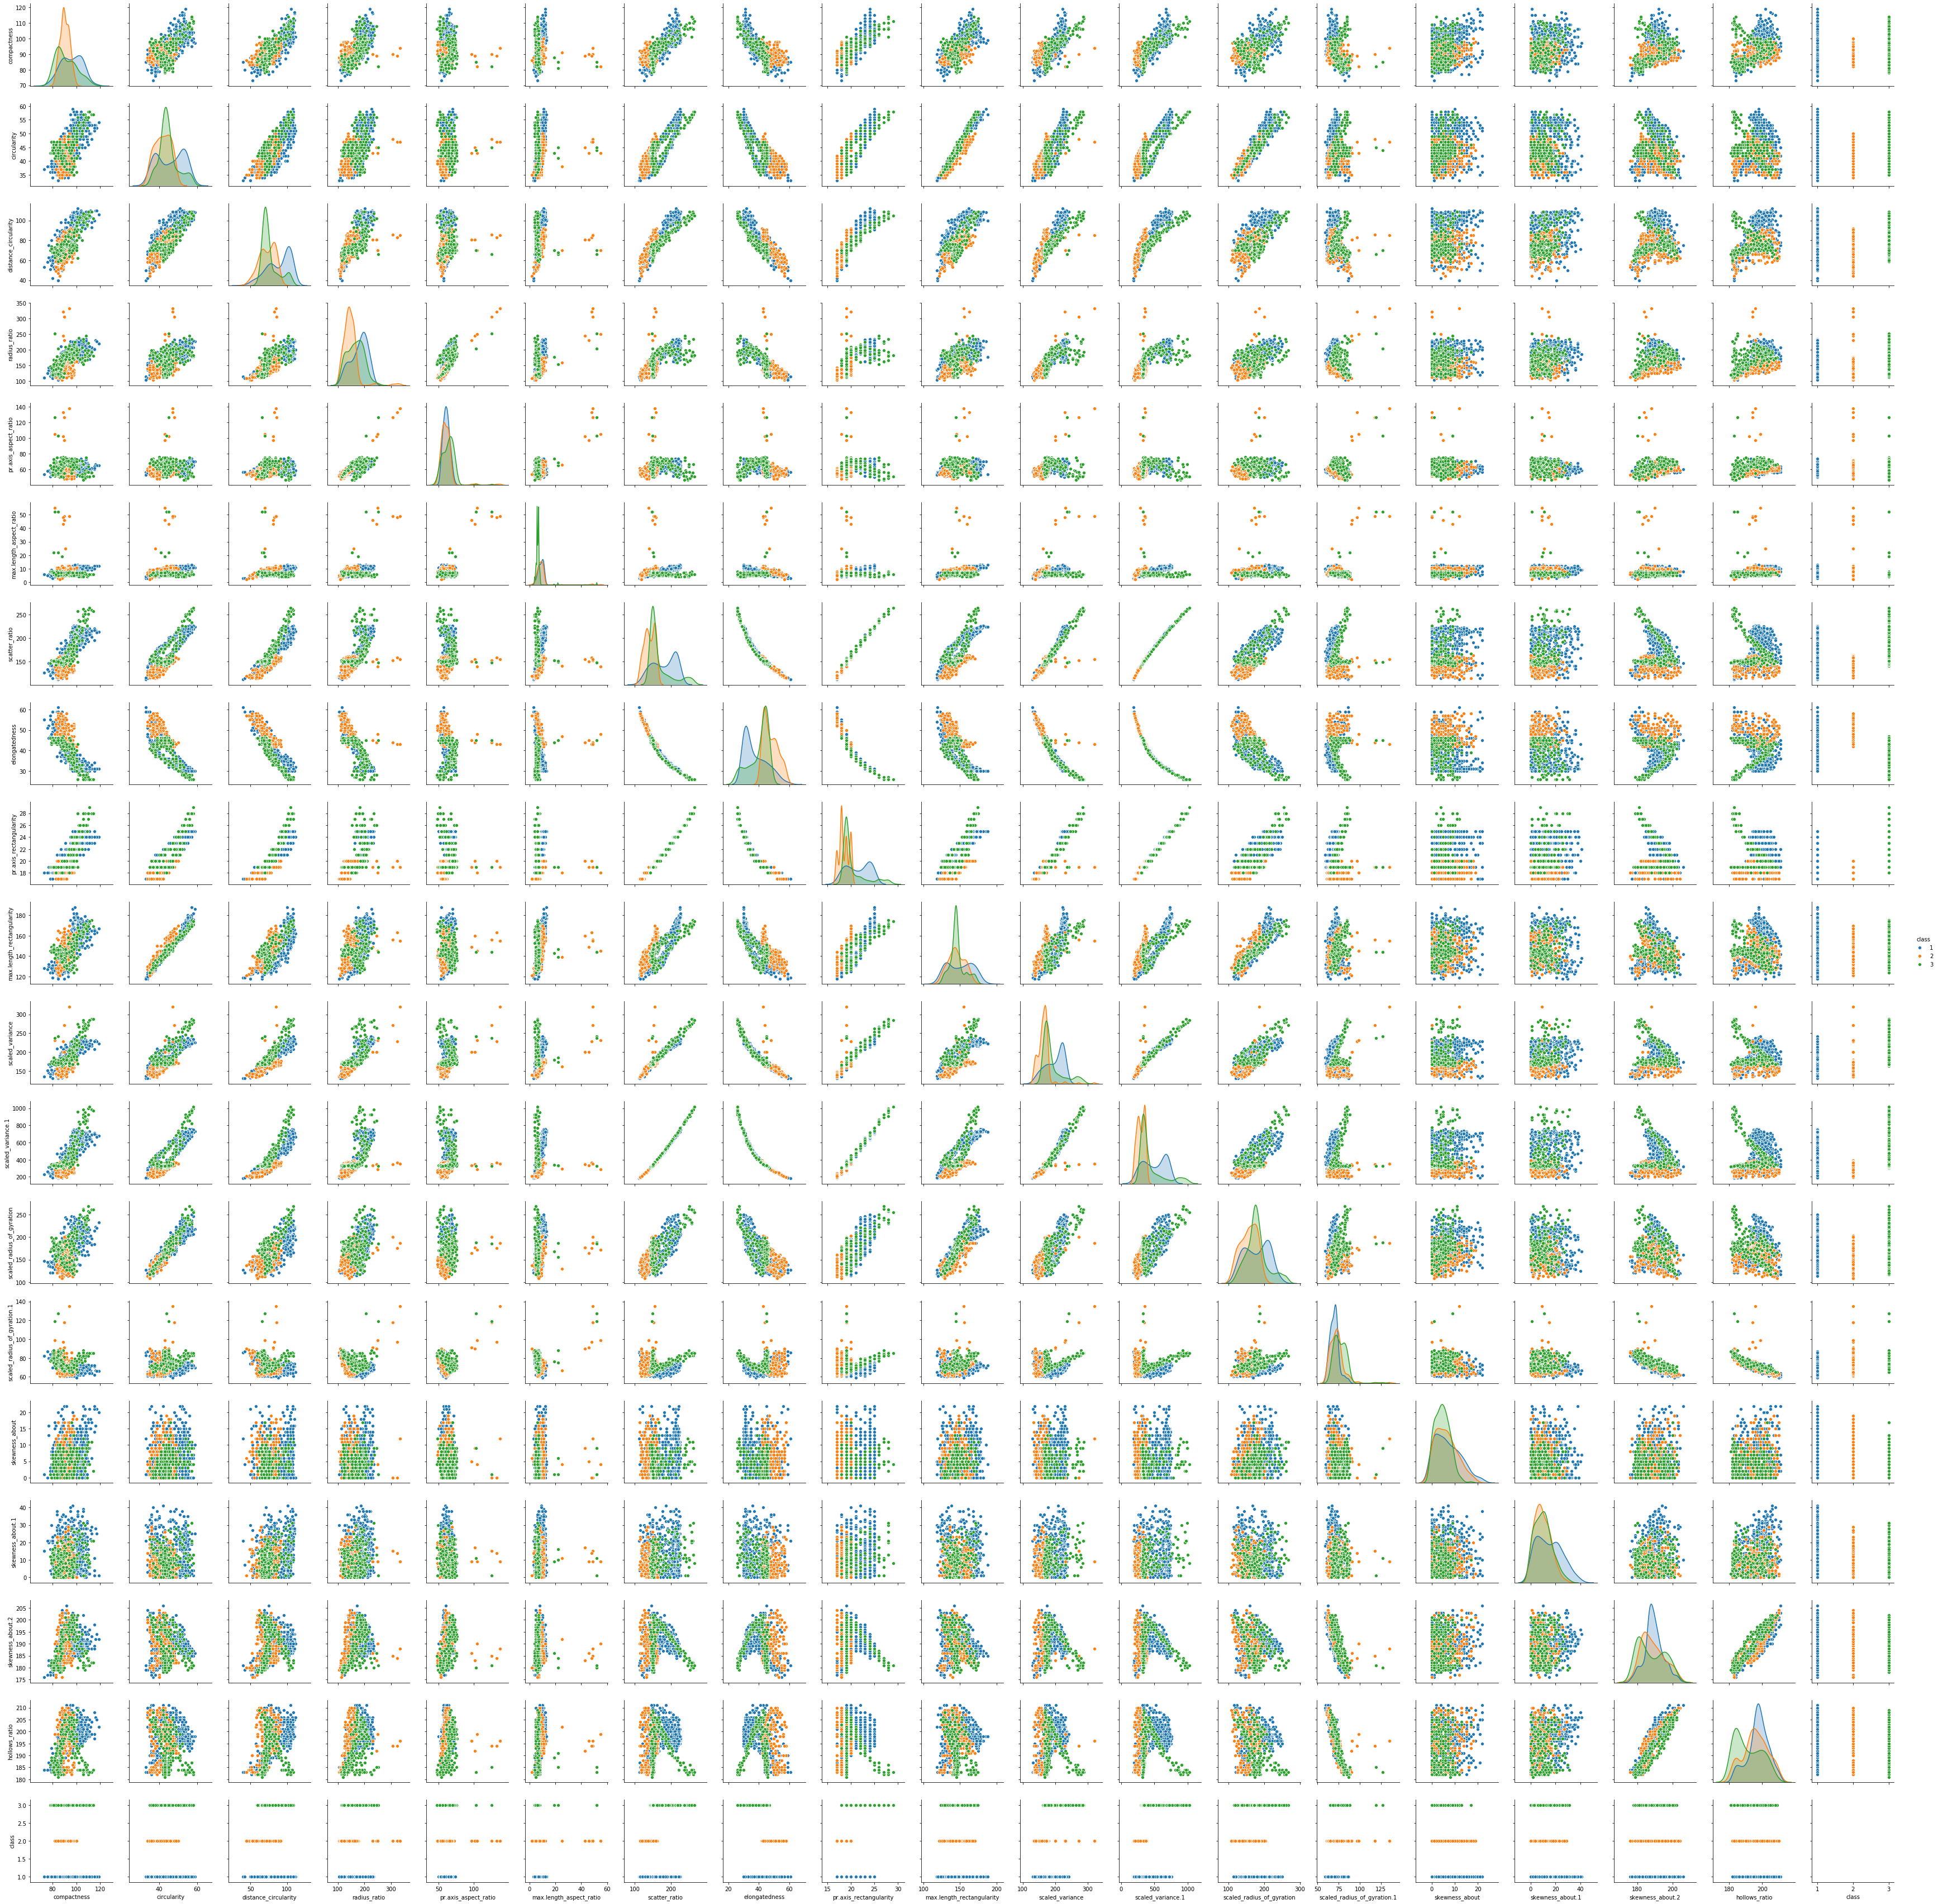

In [10]:
sns.pairplot(vehicle_dna_df, diag_kind='kde', hue = 'class')   # to plot density curve instead of histogram 

In [14]:
from scipy.stats import zscore
vehicle_df_attr_z = vehicle_dna_df.apply(zscore)

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [65]:
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Let us check optimal number of clusters-
distortion = []



You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [66]:
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6

cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(vehicle_df_attr_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
 # cluster_errors.append( clusters.inertia_ )    # capture the intertia
  distortion.append(sum(np.min(distance.cdist(vehicle_df_attr_z, clusters.cluster_centers_, 'euclidean'), axis=1))/ vehicle_df_attr_z.shape[0])

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:19]

num_clusters  cluster_errors
0             1        4.077071
1             2        3.114282
2             3        2.810012
3             4        2.717051
4             5        2.567290
5             6        2.465200
6             7        2.372887
7             8        2.297326
8             9        2.212801

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

In [67]:
distortion

[4.1768945898997005,
 3.2272767958203716,
 2.811484702389721,
 2.7159320714446573,
 2.6142535733549543,
 2.4753189961120645,
 2.3835842557088394,
 2.3063294338261797,
 2.251693942960538]

### 6. Plotting Elbow/ Scree Plot

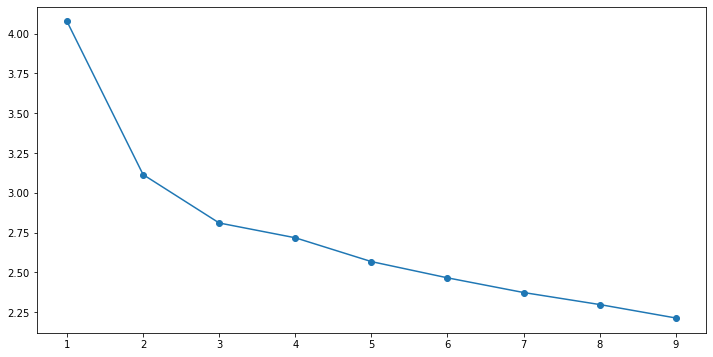

In [68]:
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )


Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

### Find out the optimal value of K

In [69]:
# The elbow plot confirms our visual analysis that there are likely 3 or 4 good clusters


### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [105]:
cluster = KMeans( n_clusters = 3, random_state = 1 )
cluster.fit(vehicle_df_attr_z)
vehicle_df_attr_z_copy = vehicle_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [106]:
centroids = cluster.cluster_centers_
centroids

array([[-0.89977351, -0.480658  , -0.84706481, -0.97644452, -0.3756605 ,
        -0.11175748, -0.75929169,  0.83171124, -0.7281853 , -0.43737273,
        -0.74675133, -0.76631268, -0.36020762,  0.80442909, -0.09489295,
        -0.30683158, -1.00026153, -1.03444694,  0.39429707,  2.01915709,
         2.01915709],
       [ 1.13356255,  1.17596822,  1.20158854,  1.01373185,  0.19396801,
         0.31706695,  1.27736475, -1.19570977,  1.27974583,  1.09446045,
         1.22377633,  1.28716461,  1.08696681, -0.04161885,  0.16240806,
         0.26352564, -0.00350589,  0.18802418, -0.48054801,  1.02316602,
         1.02316602],
       [-0.20051814, -0.61134482, -0.30760245, -0.02629532,  0.16317295,
        -0.18072232, -0.45277249,  0.31608258, -0.48258637, -0.57785316,
        -0.41657329, -0.45518097, -0.6399666 , -0.67978399, -0.05903286,
         0.04037509,  0.89411701,  0.75526413,  0.07355085,  0.        ,
         0.        ]])

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [107]:
centroid_df = pd.DataFrame(centroids, columns = list(vehicle_df_attr_z) )
centroid_df

compactness  circularity  distance_circularity  radius_ratio  \
0    -0.899774    -0.480658             -0.847065     -0.976445   
1     1.133563     1.175968              1.201589      1.013732   
2    -0.200518    -0.611345             -0.307602     -0.026295   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0             -0.375660                -0.111757      -0.759292   
1              0.193968                 0.317067       1.277365   
2              0.163173                -0.180722      -0.452772   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  ...  \
0       0.831711               -0.728185                  -0.437373  ...   
1      -1.195710                1.279746                   1.094460  ...   
2       0.316083               -0.482586                  -0.577853  ...   

   scaled_variance.1  scaled_radius_of_gyration  scaled_radius_of_gyration.1  \
0          -0.766313                  -0.360208                     0.804429   
1           1.287165                   1.086967                    -0.041619   
2          -0.455181                  -0.639967                    -0.679784   

   skewness_about  skewness_about.1  skewness_about.2  hollows_ratio  \
0       -0.094893         -0.306832         -1.000262      -1.034447   
1        0.162408          0.263526         -0.003506       0.188024   
2       -0.059033          0.040375          0.894117       0.755264   

      class   CLUSTER   labels2  
0  0.394297  2.019157  2.019157  
1 -0.480548  1.023166  1.023166  
2  0.073551  0.000000  0.000000  

[3 rows x 21 columns]

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [108]:
vehicle_df_attr_z['labels2'] = cluster.labels_ 

vehicle_df_attr_z.groupby(["labels2"]).count()

compactness  circularity  distance_circularity  radius_ratio  \
labels2                                                                 
0                261          261                   261           261   
1                259          259                   259           259   
2                293          293                   293           293   

         pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
labels2                                                                 
0                         261                      261            261   
1                         259                      259            259   
2                         293                      293            293   

         elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
labels2                                                                     
0                  261                     261                        261   
1                  259                     259                        259   
2                  293                     293                        293   

         scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
labels2                                                                  
0                    261                261                        261   
1                    259                259                        259   
2                    293                293                        293   

         scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
labels2                                                                  
0                                261             261               261   
1                                259             259               259   
2                                293             293               293   

         skewness_about.2  hollows_ratio  class  CLUSTER  
labels2                                                   
0                     261            261    261      261  
1                     259            259    259      259  
2                     293            293    293      293

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [88]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

### 9. Combine all three arrays a,b,c into a dataframe

In [98]:
abc = np.concatenate([a,b,c], axis=0)

In [101]:
abc.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

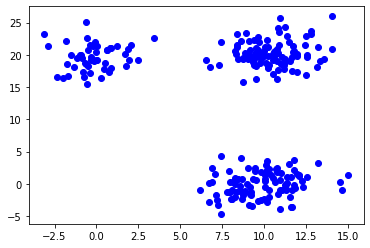

In [112]:
plt.scatter(abc[:,0],abc[:,1],c='blue')



### 11. Find out the linkage matrix

In [113]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(abc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

Use ward as linkage metric and distance as Eucledian

In [118]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [117]:
Z = linkage(abc, 'ward')
c, coph_dists = cophenet(Z , pdist(abc))

c

0.9602517937462758

### 12. Plot the dendrogram for the consolidated dataframe

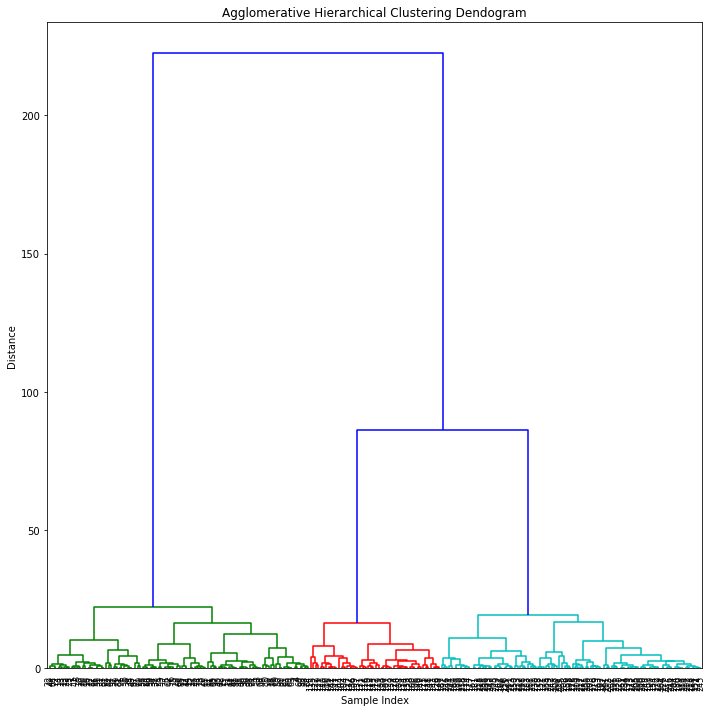

In [127]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 50, leaf_font_size=8. )
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

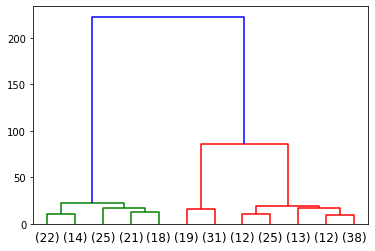

In [120]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
)
plt.show()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

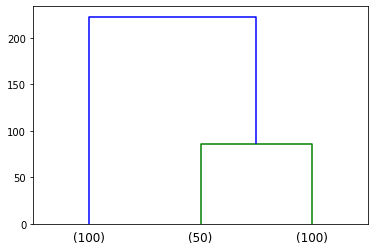

In [126]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [ ]:
# Optimal distance between clusters can be between 50 and 250 giving us 3 distinct clusters.

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [129]:
from scipy.cluster.hierarchy import fcluster
max_d = 50
clusters = fcluster(Z, max_d, criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

### Use matplotlib to visually observe the clusters in 2D space 

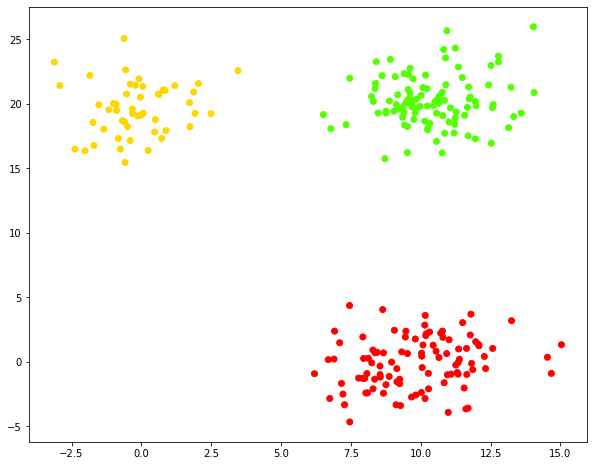

In [130]:
plt.figure(figsize=(10, 8))
plt.scatter(abc[:,0], abc[:,1], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()